In [1]:
import sys
import numpy as np
from apply_ltspice_filter import apply_ltspice_filter
import matplotlib.pyplot as plt
from sigproc_kit import *
from my_utils import *

#if installed in a non-standard directory
ltspice_command = "wine /LTspiceXVII/XVIIx64.exe -Run -b"


circuit_file = "spice/vca_01.asc"


Found Numpy. WIll be used for storing data


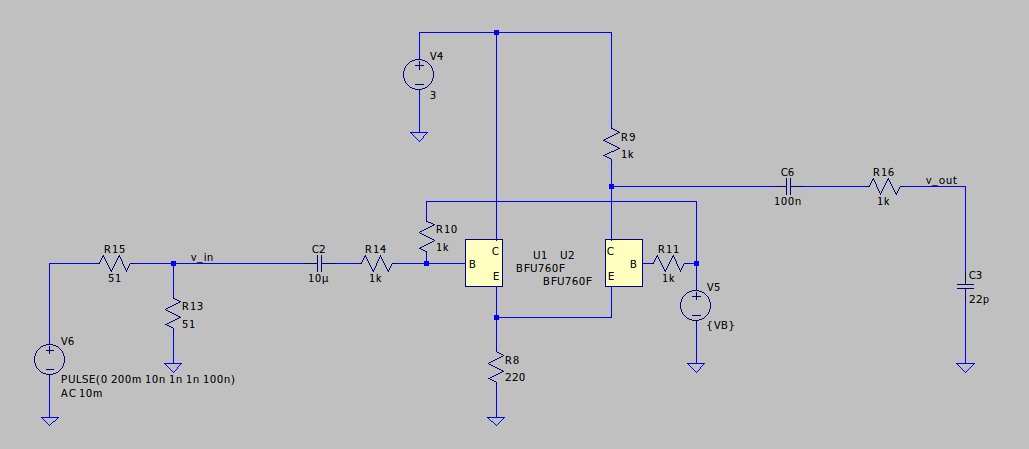

In [16]:
from IPython.display import Image

with open('./084963429f4e42ebcec8b9a1afe47a36.png','rb') as f:
    display(Image(data=f.read(), format='png'))

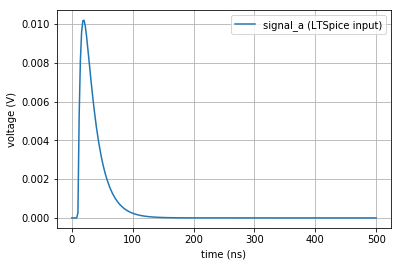

In [2]:
##################################################
##             generate test signal             ##
##################################################

# our samples shall be 100 ms wide
sample_width=0.5e-6
# time step between samples: 0.1 ms
delta_t=2e-9
samples = int(sample_width/delta_t)

time = np.linspace(0,sample_width,samples)

signal_a = detector_signal_function(time,6.5e-12,5e-9,20e-9,10e-9)

plt.plot(time*1e9,signal_a, label="signal_a (LTSpice input)")
plt.xlabel("time (ns)")
plt.ylabel("voltage (V)")
plt.grid(True)

plt.legend()
plt.show()


In [3]:
##################################################
##        apply filter - configuration 1        ##
##################################################

# all values in SI units
configuration_1 = {
  "VB":1.2 
}

dummy, signal_b1 = apply_ltspice_filter(
      circuit_file,
      time, signal_a,
      params=configuration_1,
      ltspice_command = ltspice_command
      )


trancmd.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access


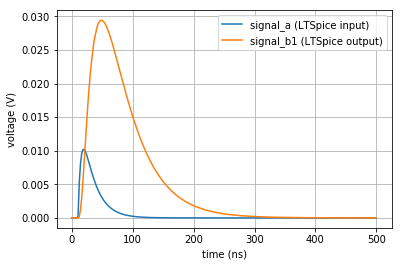

In [4]:
##################################################
##           plot input vs output(s)            ##
##################################################
  
plt.plot(time*1e9,signal_a, label="signal_a (LTSpice input)")
plt.plot(time*1e9,signal_b1, label="signal_b1 (LTSpice output)")
plt.xlabel("time (ns)")
plt.ylabel("voltage (V)")
#plt.ylim((-1,4.5))
plt.grid(True)

plt.legend()
plt.show()

In [5]:
##################################################
##                    Q scan                    ##
##################################################
big_figure()


data={}

for vb in np.arange(0.5,1.8,0.1):
  Q_list = []
  in_amp_list = []
  out_amp_list = []

  for Q in np.linspace(0.1e-12,100e-12,20):
    Q_list += [Q]
    signal_a = detector_signal_function(time,Q,5e-9,20e-9,10e-9)
    dummy, signal_b1 = apply_ltspice_filter(
          circuit_file,
          time, signal_a,
          params={ "VB":vb },
          ltspice_command = ltspice_command
          )
    #plt.plot(time*1e9,signal_a, label="input Q={:3.3f} pC".format(Q*1e12))
    #plt.plot(time*1e9,signal_b1, label="output Q={:3.3f} pC".format(Q*1e12))

    out_amp_list += [np.max(abs(signal_b1))]
    in_amp_list  += [np.max(abs(signal_a))]
    

  Q = np.array(Q_list)    
  out_amp = np.array(out_amp_list)    
  in_amp = np.array(in_amp_list)    

  data[vb] = {"Q":Q, "out_amp":out_amp,"in_amp":in_amp}
    


trancmd.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw


Normal access
trancmd.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older th

Normal access
trancmd.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older th

Normal access
trancmd.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older th

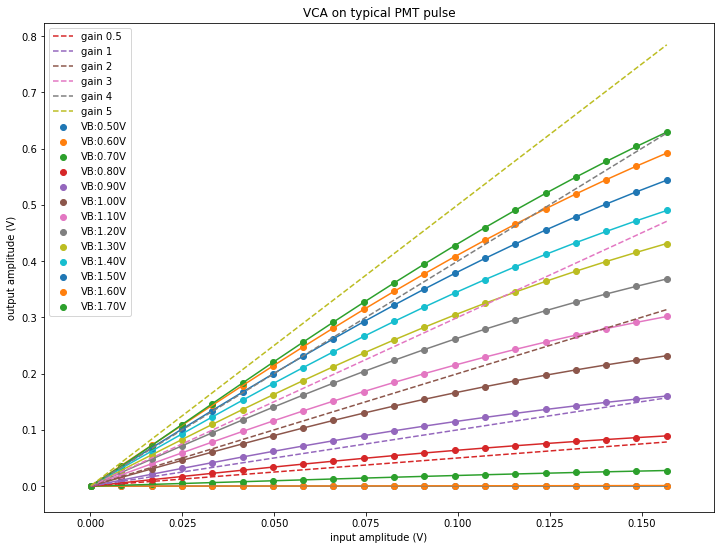

In [11]:
for vb in data.keys():
  Q = data[vb]["Q"]
  out_amp = data[vb]["out_amp"]
  in_amp = data[vb]["in_amp"]

  plt.scatter(in_amp,out_amp,label="VB:{:2.2f}V".format(vb))
  plt.plot(in_amp,out_amp)
    
plt.plot(in_amp,0.5*in_amp,"--",label="gain 0.5")
plt.plot(in_amp,  1*in_amp,"--",label="gain 1")
plt.plot(in_amp,  2*in_amp,"--",label="gain 2")
plt.plot(in_amp,  3*in_amp,"--",label="gain 3")
plt.plot(in_amp,  4*in_amp,"--",label="gain 4")
plt.plot(in_amp,  5*in_amp,"--",label="gain 5")
plt.xlabel("input amplitude (V)")
plt.ylabel("output amplitude (V)")
plt.title("VCA on typical PMT pulse")
plt.legend()
plt.show()

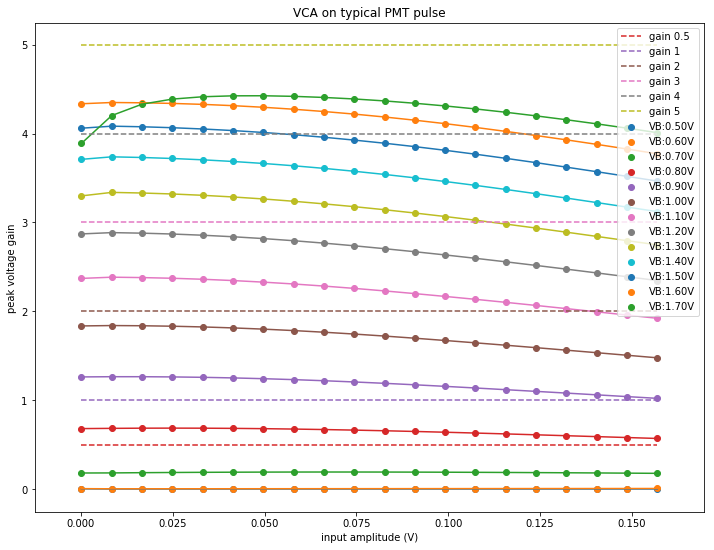

In [15]:
for vb in data.keys():
  Q = data[vb]["Q"]
  out_amp = data[vb]["out_amp"]
  in_amp = data[vb]["in_amp"]

  plt.scatter(in_amp,out_amp/in_amp,label="VB:{:2.2f}V".format(vb))
  plt.plot(in_amp,out_amp/in_amp)
    
plt.plot(in_amp,0.5+0*in_amp,"--",label="gain 0.5")
plt.plot(in_amp,  1+0*in_amp,"--",label="gain 1")
plt.plot(in_amp,  2+0*in_amp,"--",label="gain 2")
plt.plot(in_amp,  3+0*in_amp,"--",label="gain 3")
plt.plot(in_amp,  4+0*in_amp,"--",label="gain 4")
plt.plot(in_amp,  5+0*in_amp,"--",label="gain 5")
plt.xlabel("input amplitude (V)")
plt.ylabel("peak voltage gain")
plt.title("VCA on typical PMT pulse")
plt.legend()
plt.show()